In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as st

In [2]:
k=3

In [3]:
df = pd.read_csv('cluster_T2.csv',header=None)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,0,1
0,16.861644,333.578385
1,17.288813,335.227181
2,20.406209,400.570303
3,20.103731,399.650578
4,18.229478,380.078280


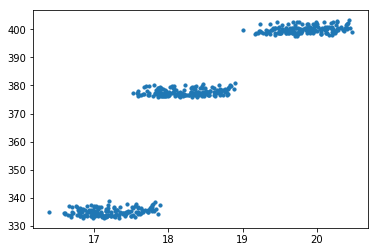

<Figure size 432x288 with 0 Axes>

In [35]:
plt.scatter(df[0],df[1], s=10, cmap = 'cool')
plt.show()
plt.savefig('q1initial.png')

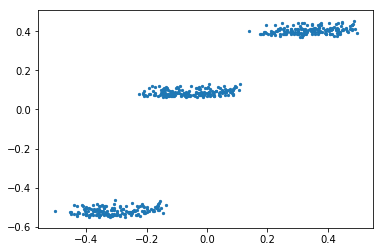

In [6]:
data = df.values
a=(max(data[:,0])-min(data[:,0]))
b=(max(data[:,1])-min(data[:,1]))
am=(sum(data[:,0])/len(data[:,0]))
bm=(sum(data[:,1])/len(data[:,1]))
data[:,0]=(data[:,0]-(sum(data[:,0])/len(data[:,0])))/(max(data[:,0])-min(data[:,0]))
data[:,1]=(data[:,1]-(sum(data[:,1])/len(data[:,1])))/(max(data[:,1])-min(data[:,1]))
data
plt.scatter(data[:,0],data[:,1],s=5)
plt.show()

In [7]:
arr = np.arange(len(df))
np.random.shuffle(arr)
seeds=[]
for x in arr[0:k]:
    seeds.append(data[x])
print(seeds)

[array([-0.17327327,  0.08325717]), array([0.35821494, 0.41601677]), array([-0.32175903, -0.5475089 ])]


In [8]:
def distance(a,b):
    return ((a[0]-b[0])**(2)+(a[1]-b[1])**(2))**(0.5)
def cmpare(a,b):
    s=0
    if len(a)==0 or len(b) == 0:
        return 1
    for x in range(len(a)):
        s+=distance(a[x],b[x])
    return s


In [9]:
new_seeds=[]
while(cmpare(new_seeds,seeds) >1e-20):
    if len(new_seeds)!=0:
        seeds=new_seeds
        new_seeds=[]
    clusters=[]
    for s in range(k):
        clusters.append([0,0,0])
    for y in data:
        temp=[]
        for x in seeds:
            temp.append(distance(x,y))
        m=temp.index(min(temp))
        clusters[m][0]+=y[0]
        clusters[m][1]+=y[1]
        clusters[m][2]+=1
    new_seeds=[]
    for x in clusters:
        temp=[]
        temp.append(x[0]/x[2])
        temp.append(x[1]/x[2])
        new_seeds.append(temp)
    print(new_seeds[1][0],new_seeds[1][1])


0.33895108240721 0.40442202020857215
0.33895108240721 0.40442202020857215


In [10]:
new_seeds

[[-0.05241575630507338, 0.08734374602858859],
 [0.33895108240721, 0.40442202020857215],
 [-0.30616401621849615, -0.5188867241766699]]

In [11]:
c=[]
for x in data:
    temp=[]
    for y in seeds:
        temp.append(distance(x,y))
    m=temp.index(min(temp))
    c.append(m)
df['c']=c


In [12]:
a

4.086592920000001

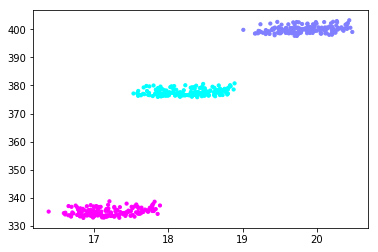

In [13]:
plt.scatter(df[0]*a+am, df[1]*b+bm, c=df['c'], s=10,cmap = 'cool')
plt.show()